In [1]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=pymanopt_UB'
seed = 44

In [2]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

[Errno 17] File exists: '/Users/fultonw/Documents/projects/runs/domain_adapt_run/domain_adapt_run/notebooks/new/hyperparameter_loss_surface_stratified/boston_housing/cache/ratio=logreg;loss=squared;method=pymanopt_UB'


In [3]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

Couldn't import dot_parser, loading of dot files will not be possible.


In [4]:
# define data
training_proportion = 0.65
training_sampler = functools.partial(data.doubly_robust_paper_pca_subsample, 0.3)
get_data_f = data.boston_housing
num_data = 350

In [5]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

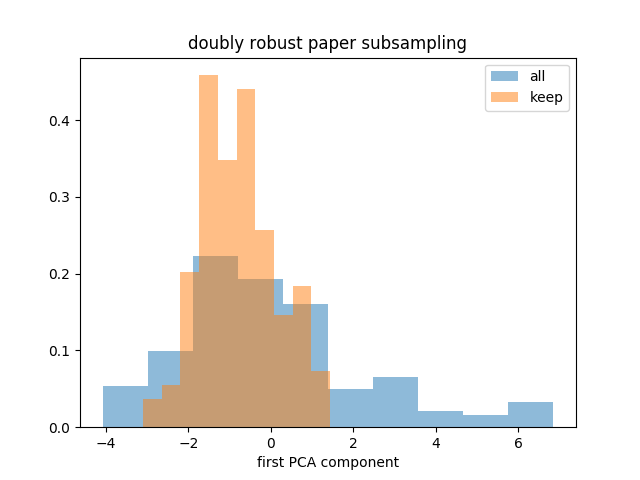

('seed: 1',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (222, 13) original_ys_train: (222,)',)
('original_xs_test: (128, 13) original_ys_test: (128,)',)
('sampled_xs_train: (120, 13) sampled_ys_train: (120,)',)


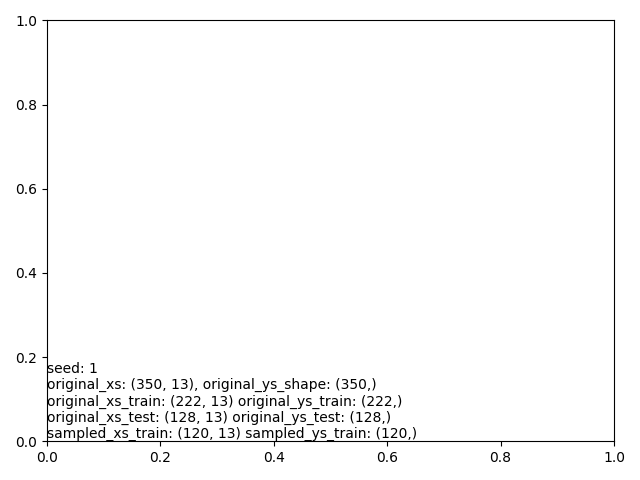

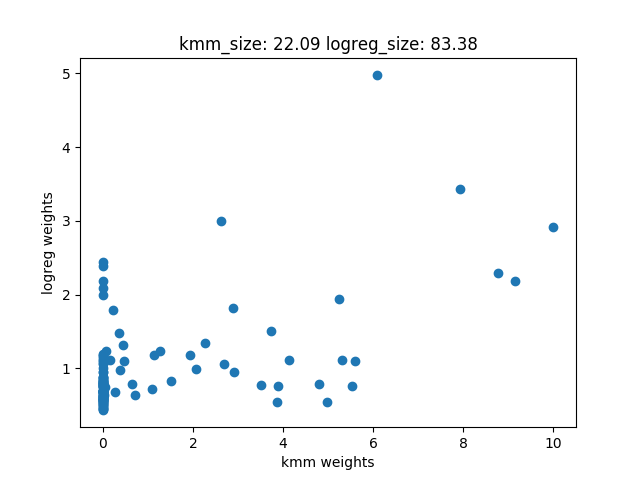

xs_train shape: (120, 13) xs_test_shape (120,)


In [6]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [7]:
# define fitter
pymanopt_options={'logverbosity':2, 'maxiter':100}
#u_dim = 1
unconstrained = False
num_tries = 5
plot_b_info = constructors.plot_b_info
def get_fitter(c_lsqr_loss, c_lsqr_loss_eval, c_lsqr, c_logreg, weight_reg, UB_reg, sigma, max_ratio, u_dim):
    B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=(xs_train.shape[1],u_dim)))
    return constructors.logreg_ratio_UB_fitter(c_lsqr, c_logreg, weight_reg, UB_reg, sigma, B_init_f_getter, unconstrained, c_lsqr_loss, c_lsqr_loss_eval, max_ratio=max_ratio, num_tries=num_tries, pymanopt_options=pymanopt_options, plot_b_info=plot_b_info)

In [8]:
# define hyperparameter search space via an iterator
UB_regs = [0.]#1,1.,10.]
u_dims = [1,]
c_lsqr_losses = [1.]
c_lsqr_loss_evals = [0.]
c_lsqrs = [.1,1.,10.,100]
c_logregs = [0.1,1.,10.]
weight_regs = [0.1,1.,10.]
sigmas = [0.25,1.,5.]#,5.]
max_ratios = [5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
    make_tuple('UB_reg',UB_regs), 
    make_tuple('u_dim',u_dims), 
    )
nocare_hyperparam_tuples = itertools.product(
    make_tuple('c_lsqr_loss',c_lsqr_losses), 
    make_tuple('c_lsqr_loss_eval',c_lsqr_loss_evals), 
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('weight_reg',weight_regs), 
    make_tuple('UB_reg',UB_regs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [9]:
# define mapper
mapper = map

In [10]:
#
num_iterations = 3

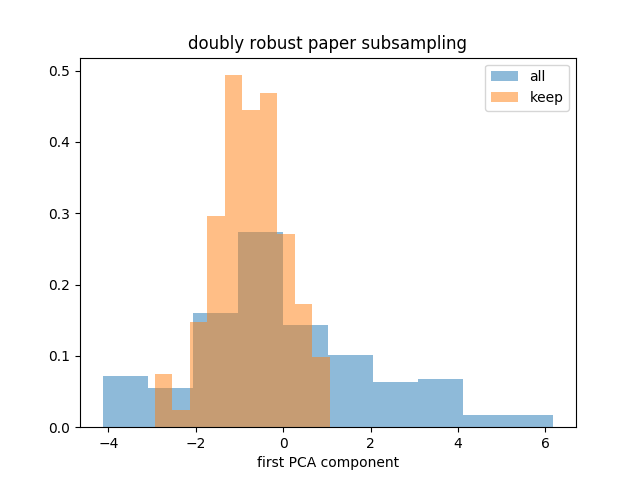

('seed: 0',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (230, 13) original_ys_train: (230,)',)
('original_xs_test: (120, 13) original_ys_test: (120,)',)
('sampled_xs_train: (101, 13) sampled_ys_train: (101,)',)


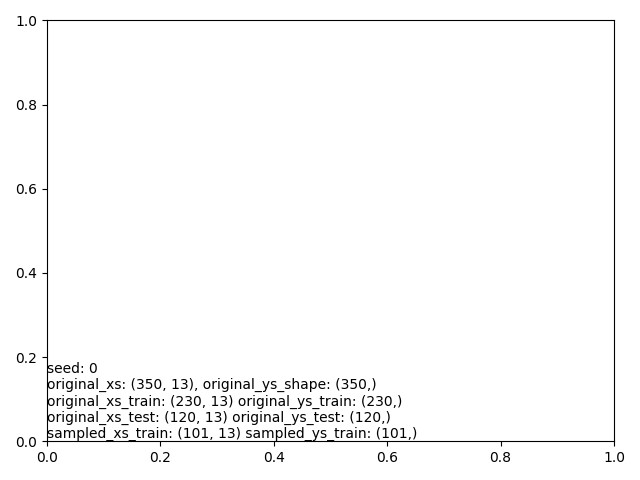

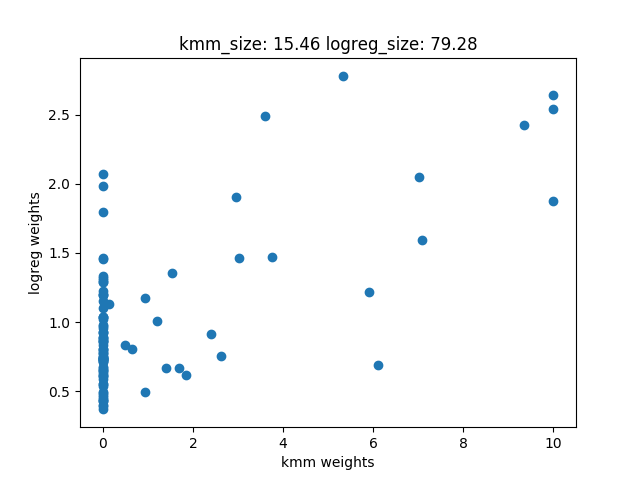

 iter		   cost val	    grad. norm
    1	+8.1832037253269998e+04	7.82098851e+04
Terminated - min stepsize reached after 1 iterations, 7.72 seconds.

 iter		   cost val	    grad. norm
    1	+7.7942994782274312e+04	6.87847047e+04
    2	+7.5994122038101559e+04	9.68594235e+04
    3	+7.3312594455606115e+04	5.89087734e+04
    4	+7.1710302954398459e+04	6.76023924e+04
    5	+6.9888508758925222e+04	8.59628308e+04
    6	+6.5087185070854750e+04	1.37880749e+05
    7	+6.1524782390224005e+04	1.27626210e+05
    8	+5.8655328685590903e+04	9.86629805e+04
    9	+5.7712072984174833e+04	5.30670350e+04
   10	+5.7646286845315044e+04	9.91048560e+04
   11	+5.7402992999089875e+04	8.43089091e+04
   12	+5.6766732840689998e+04	3.38316677e+04
   13	+5.6512061505630365e+04	7.67272395e+04
   14	+5.5763888706737969e+04	4.29092421e+04
   15	+5.2698101360437671e+04	1.53065270e+05
   16	+5.1225443665068284e+04	3.81553913e+04
   17	+5.0869055954455893e+04	1.15092646e+05
   18	+5.0115019478464208e+04	2.97518549e+04
   19	+4

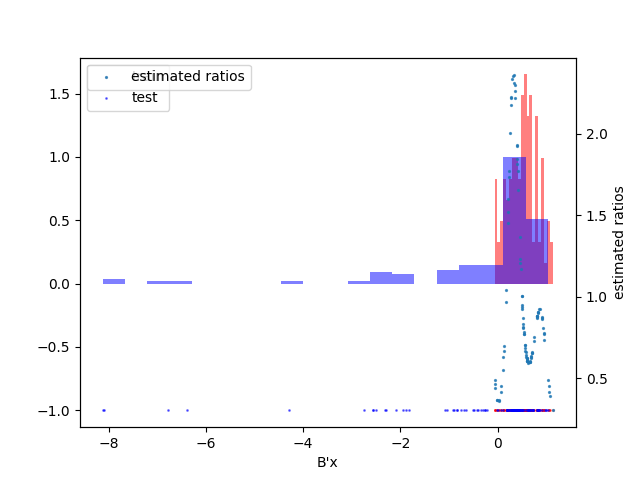

('train_loss: 11073.50',)
('test_loss: 783802.09',)


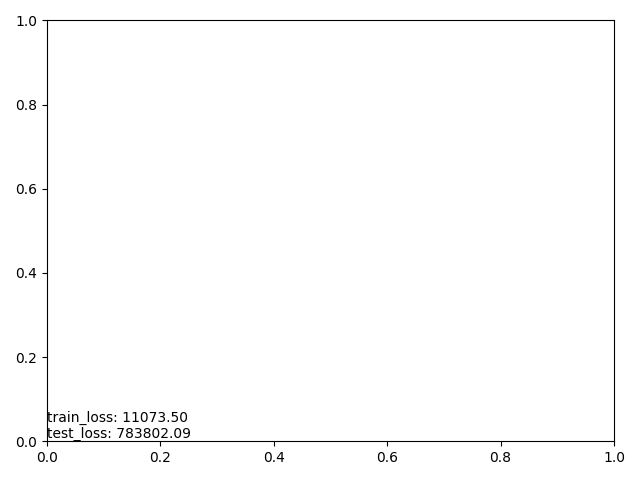

b_norm: 1.0


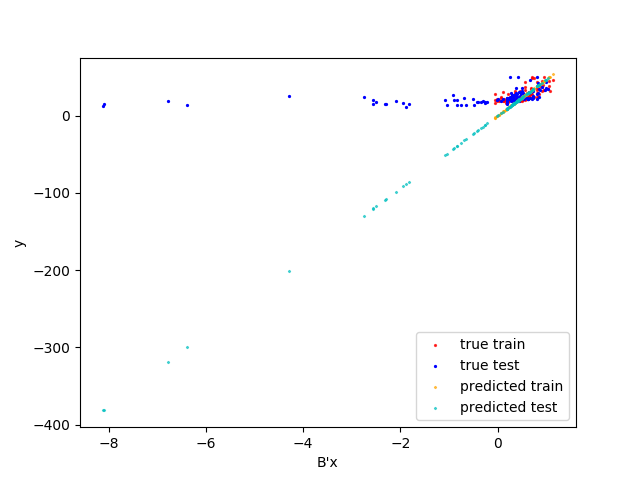

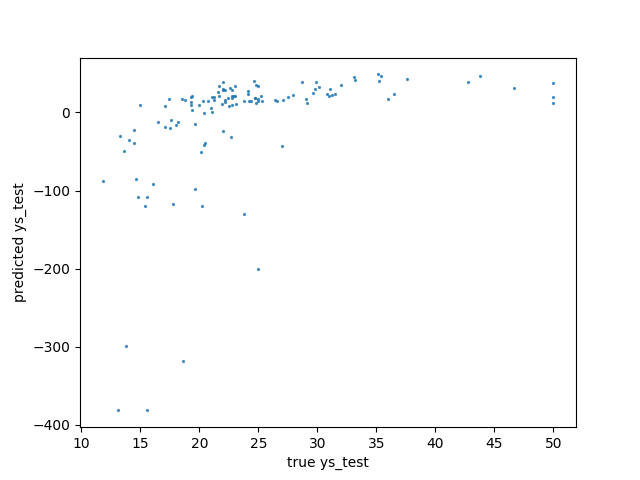

         447420588 function calls (445204395 primitive calls) in 622.189 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
28268658/26413322  138.587    0.000  337.017    0.000 core.py:121(__call__)
  2121799   50.542    0.000   50.542    0.000 {numpy.core.multiarray.dot}
   399376   38.360    0.000  426.105    0.001 core.py:35(backward_pass)
   146960   30.376    0.000   96.055    0.001 utils.py:19(get_gaussian_K)
  1122628   27.414    0.000  161.556    0.000 numpy_grads.py:390(gradfun)
  1286628   27.281    0.000   27.281    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   170460   26.996    0.000   26.996    0.000 {method 'repeat' of 'numpy.ndarray' objects}
  1348392   19.869    0.000   30.793    0.000 numpy_extra.py:126(primitive_sum_arrays)
 71887635   17.479    0.000   17.482    0.000 {isinstance}
     1132   16.895    0.015  241.505    0.213 optimize.py:874(_minimize_bfgs)
  5613140   11.543    0.000   13.662    0.

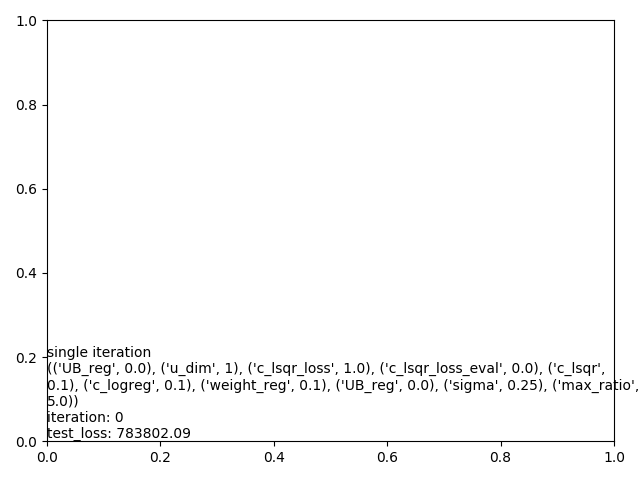

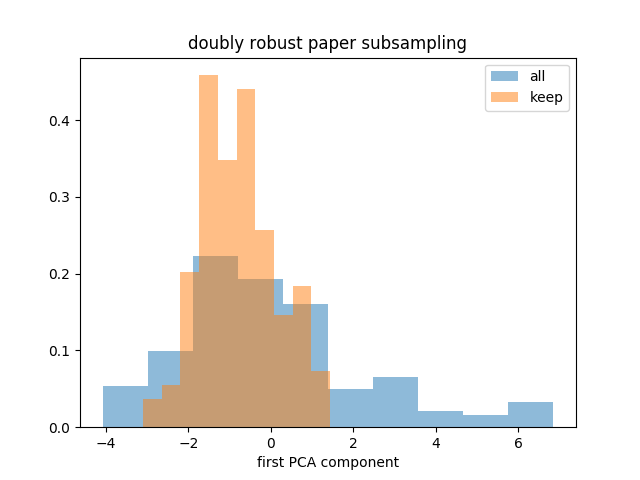

('seed: 1',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (222, 13) original_ys_train: (222,)',)
('original_xs_test: (128, 13) original_ys_test: (128,)',)
('sampled_xs_train: (120, 13) sampled_ys_train: (120,)',)


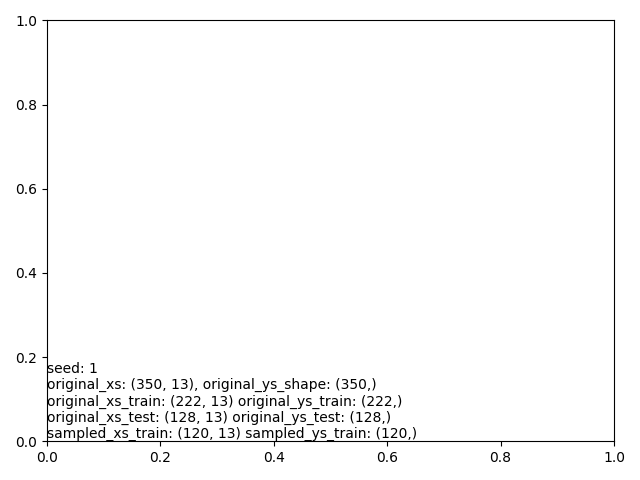

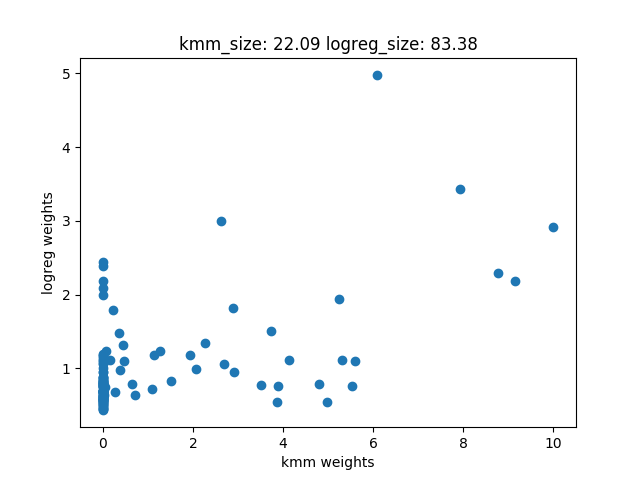

 iter		   cost val	    grad. norm
    1	+6.3830699213171152e+04	4.92372234e+04
    2	+4.6620842717059299e+04	1.25308802e+05
    3	+4.2513756537436973e+04	6.77906399e+04
    4	+3.3469159459319839e+04	6.00583903e+04
    5	+2.9681861240234546e+04	1.34908894e+05
    6	+2.4015162478362541e+04	5.10513581e+04
    7	+2.1880667588522138e+04	4.69312183e+04
    8	+2.0963396465134123e+04	3.18293518e+04
    9	+2.0828480330509730e+04	7.01209494e+04
   10	+2.0386483811210452e+04	4.67106081e+04
   11	+2.0001011768607972e+04	3.44415589e+04
   12	+1.9620210015534780e+04	2.33460567e+04
   13	+1.9438012107837374e+04	2.46332482e+04
   14	+1.9427358666098586e+04	5.99486419e+04
   15	+1.9385799953212358e+04	5.70118964e+04
   16	+1.9236520136622403e+04	4.56518963e+04
   17	+1.8925366564414133e+04	1.65063971e+04
   18	+1.8569534386972464e+04	2.43210550e+04
   19	+1.8484910134710775e+04	2.19642707e+04
   20	+1.8464024200653279e+04	2.93990108e+04
   21	+1.8394913865927683e+04	1.95869227e+04
   22	+1.832955795474

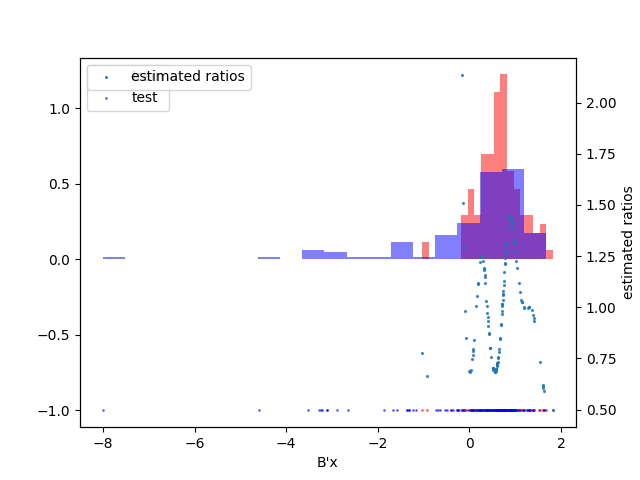

('train_loss: 19709.58',)
('test_loss: 244751.82',)


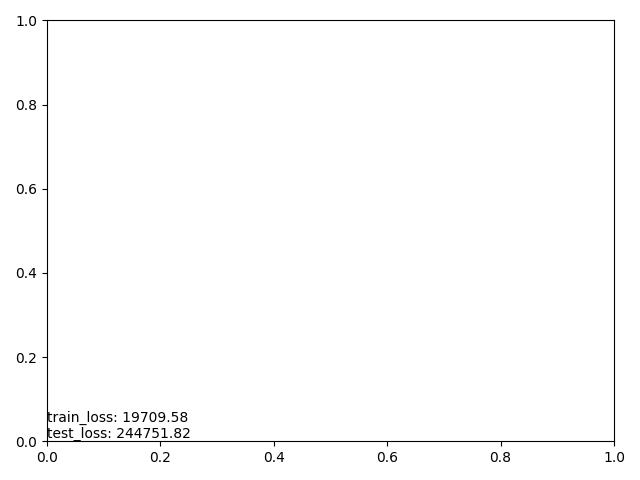

b_norm: 1.0


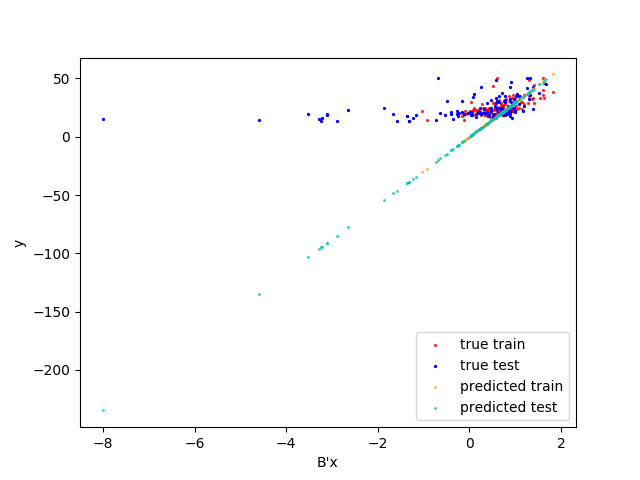

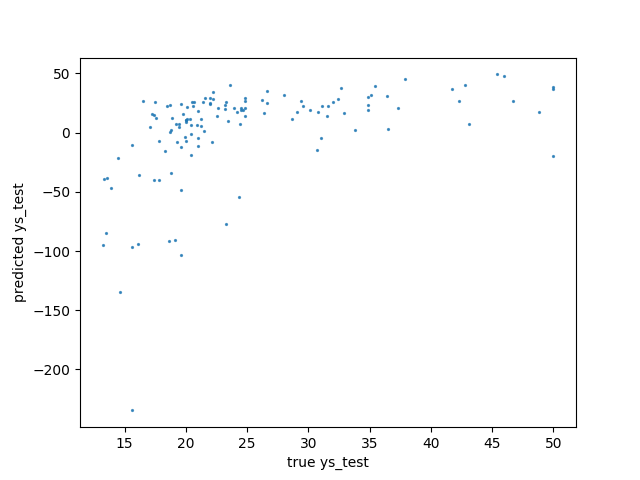

         354829547 function calls (353118912 primitive calls) in 529.014 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
22024810/20583362  120.795    0.000  290.423    0.000 core.py:121(__call__)
  1612024   46.471    0.000   46.471    0.000 {numpy.core.multiarray.dot}
   315404   32.181    0.000  357.242    0.001 core.py:35(backward_pass)
   109546   27.427    0.000   89.472    0.001 utils.py:19(get_gaussian_K)
   131484   26.657    0.000   26.657    0.000 {method 'repeat' of 'numpy.ndarray' objects}
   990879   24.561    0.000   24.561    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   875152   21.817    0.000  130.516    0.000 numpy_grads.py:390(gradfun)
  1067200   17.385    0.000   26.503    0.000 numpy_extra.py:126(primitive_sum_arrays)
      820   15.330    0.019  208.663    0.254 optimize.py:874(_minimize_bfgs)
 56119494   13.562    0.000   13.564    0.000 {isinstance}
  4375760    9.112    0.000   10.757    0.

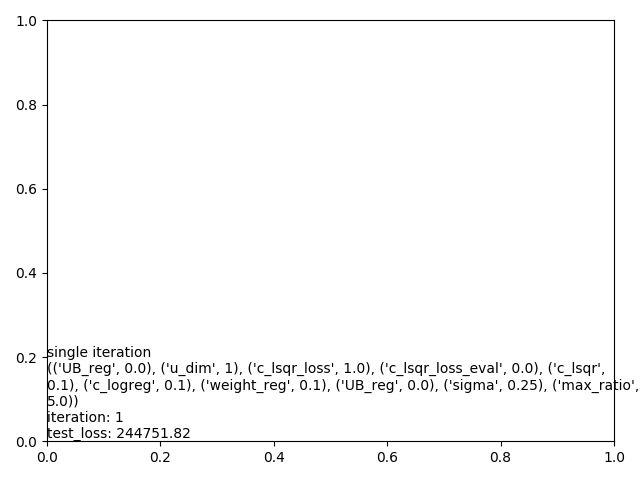

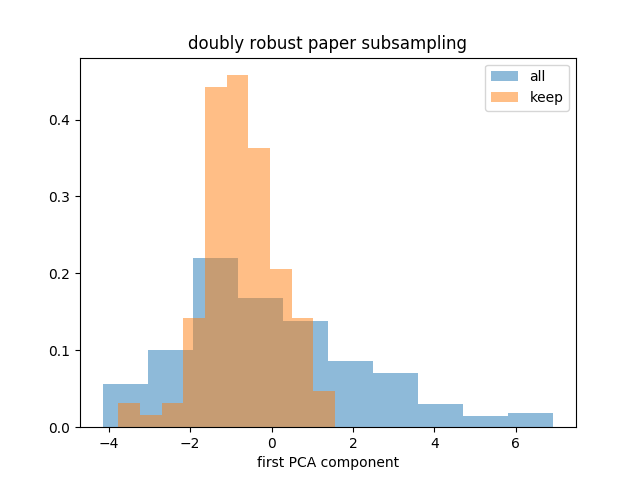

('seed: 2',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (242, 13) original_ys_train: (242,)',)
('original_xs_test: (108, 13) original_ys_test: (108,)',)
('sampled_xs_train: (119, 13) sampled_ys_train: (119,)',)


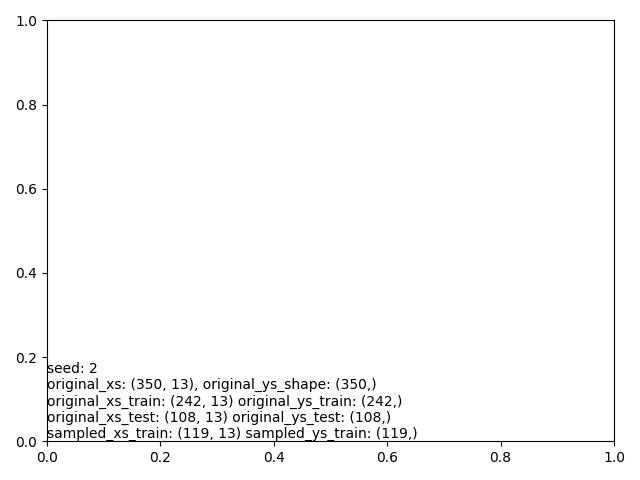

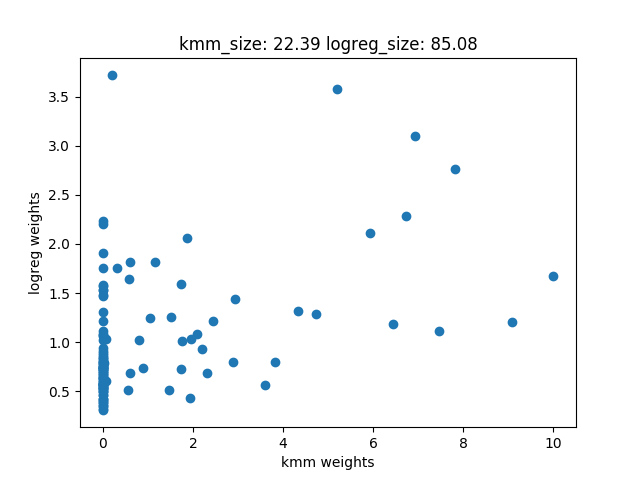

 iter		   cost val	    grad. norm
    1	+7.6966911831089761e+04	6.28148117e+04
    2	+7.3900851185020263e+04	5.45960173e+04
    3	+7.3796198164429705e+04	1.09449506e+05
    4	+7.3368413963824671e+04	1.13711022e+05
    5	+7.1711607379303838e+04	9.89991058e+04
    6	+7.1708014835150243e+04	5.03213608e+04
    7	+7.1693621437813970e+04	5.04407655e+04
    8	+7.1635769388466011e+04	5.09309435e+04
    9	+7.1399891131254903e+04	5.29512530e+04
   10	+7.0432897121671354e+04	5.18781028e+04
   11	+6.9829767652463372e+04	1.44743611e+04
   12	+6.9805974293053863e+04	3.03424166e+04
   13	+6.9722914730415781e+04	2.30449336e+04
   14	+6.9620389282752323e+04	2.03942939e+04
   15	+6.9577883302010625e+04	6.57735578e+03
   16	+6.9573565645318100e+04	8.00277860e+03
   17	+6.9566447581890141e+04	3.96834393e+03
   18	+6.9563349281286297e+04	4.32931017e+03
   19	+6.9560576973682997e+04	3.34912604e+03
   20	+6.9558492650707136e+04	4.11559577e+03
   21	+6.9557665549952668e+04	5.49883927e+03
   22	+6.955512664359

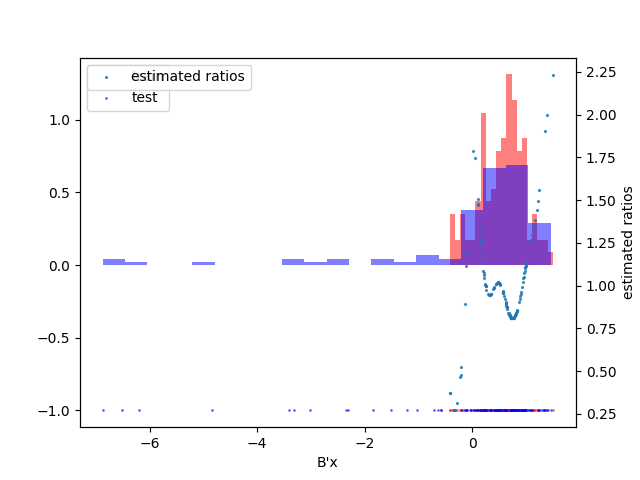

('train_loss: 18536.60',)
('test_loss: 300398.39',)


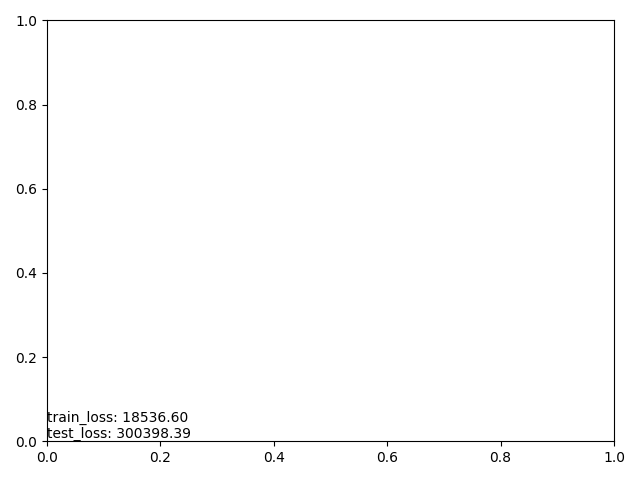

b_norm: 1.0


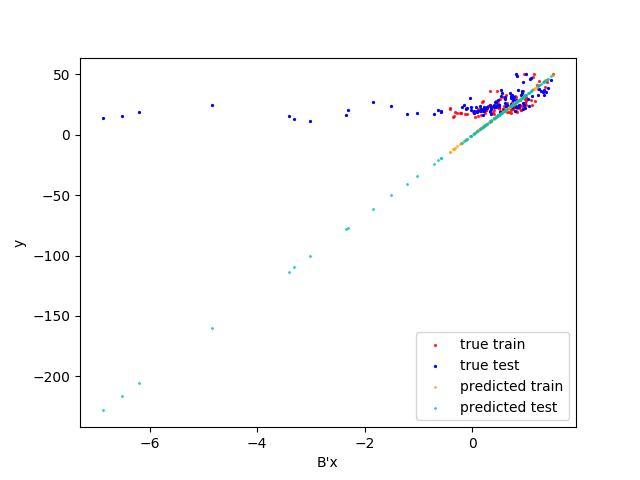

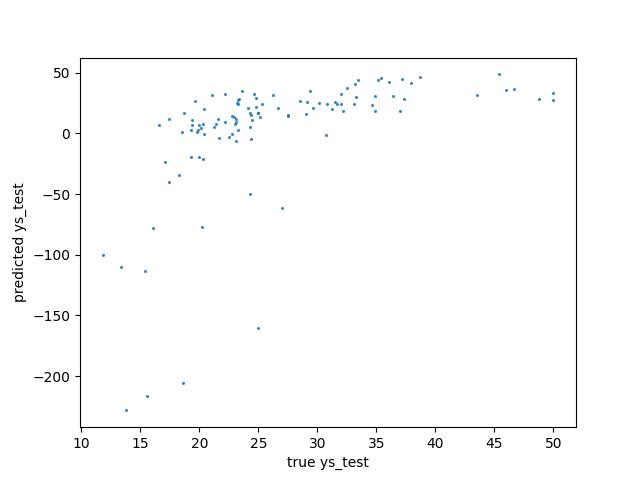

         602574552 function calls (599674818 primitive calls) in 832.071 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
37632192/35166352  181.934    0.000  452.025    0.000 core.py:121(__call__)
  2696082   66.349    0.000   66.349    0.000 {numpy.core.multiarray.dot}
   548230   54.384    0.000  590.996    0.001 core.py:35(backward_pass)
   220294   38.784    0.000   38.784    0.000 {method 'repeat' of 'numpy.ndarray' objects}
   175491   37.735    0.000  119.836    0.001 utils.py:19(get_gaussian_K)
  1493394   37.107    0.000  219.417    0.000 numpy_grads.py:390(gradfun)
  1655260   36.931    0.000   36.931    0.000 {method 'reduce' of 'numpy.ufunc' objects}
  1855244   27.760    0.000   43.132    0.000 numpy_extra.py:126(primitive_sum_arrays)
 96003534   23.319    0.000   23.321    0.000 {isinstance}
     1399   20.705    0.015  297.280    0.212 optimize.py:874(_minimize_bfgs)
  7466970   15.569    0.000   18.415    0.

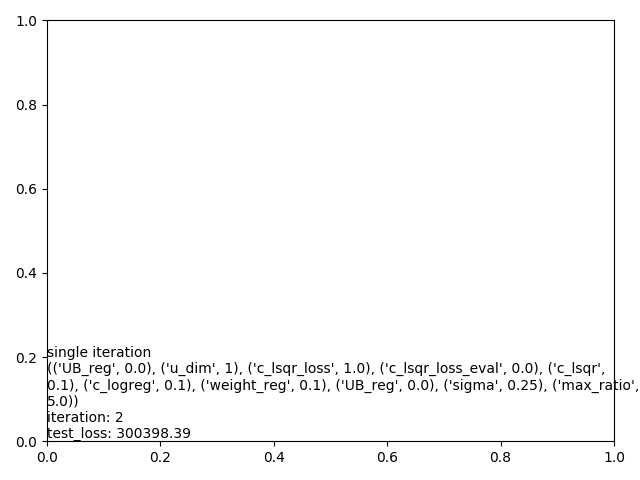

('single hyperparam',)
((('UB_reg', 0.0), ('u_dim', 1), ('c_lsqr_loss', 1.0), ('c_lsqr_loss_eval', 0.0), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('UB_reg', 0.0), ('sigma', 0.25), ('max_ratio', 5.0)),)
('mean loss: 442984.10',)
('std loss: 242063.09',)
('test losses: [783802.090993269, 244751.8229234927, 300398.39457866753]',)


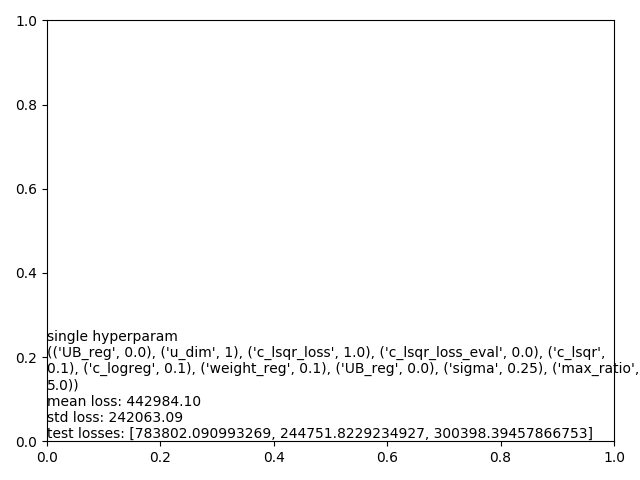

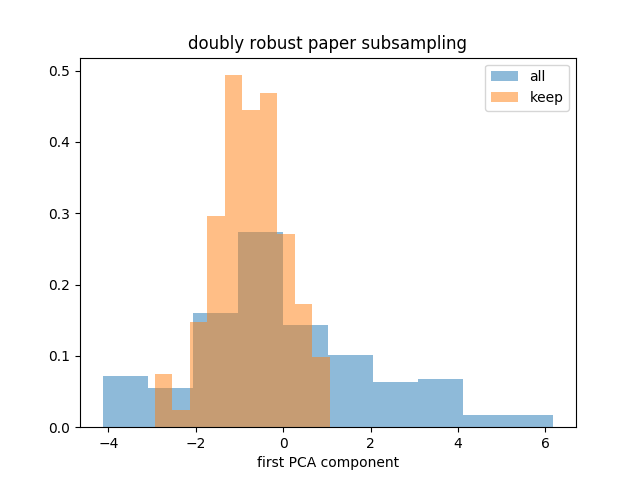

('seed: 0',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (230, 13) original_ys_train: (230,)',)
('original_xs_test: (120, 13) original_ys_test: (120,)',)
('sampled_xs_train: (101, 13) sampled_ys_train: (101,)',)


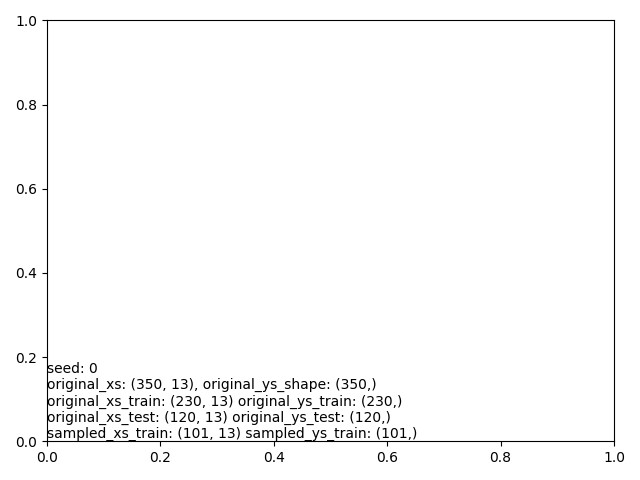

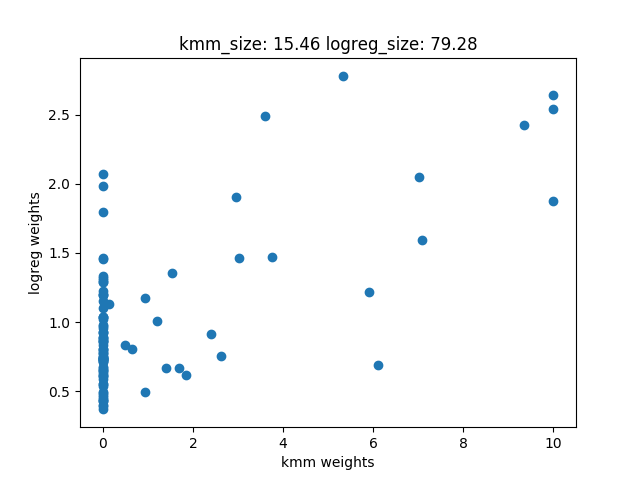

 iter		   cost val	    grad. norm
    1	+8.5861812719906782e+04	1.67776478e+04
    2	+7.6663352278374441e+04	3.83761430e+04
    3	+4.2101897219945975e+04	5.36238926e+04
    4	+2.8295339821534359e+04	5.26386918e+04
    5	+2.1117953837650373e+04	2.59484021e+04
    6	+1.9510100453578703e+04	2.42149879e+04
    7	+1.8629585097391147e+04	1.46806820e+04
    8	+1.8258785349758862e+04	2.79721937e+04
    9	+1.7317345073583158e+04	1.14965979e+04
   10	+1.6739990076268074e+04	4.85277090e+04
   11	+1.5676235787437718e+04	1.04041489e+04
   12	+1.4166190667693500e+04	1.98799597e+04
   13	+1.3488007953976499e+04	1.63120707e+04
   14	+1.3166227012611347e+04	1.16458444e+04
   15	+1.2983092968519568e+04	1.74678284e+04
   16	+1.2756030655132312e+04	1.10074019e+04
   17	+1.2687732975852441e+04	1.44351641e+04
   18	+1.2525839402105183e+04	5.10601422e+03
   19	+1.2377730700152006e+04	1.02247476e+04
   20	+1.2369622406800216e+04	1.12026590e+04
   21	+1.2340444235254807e+04	8.97699441e+03
   22	+1.228505237961

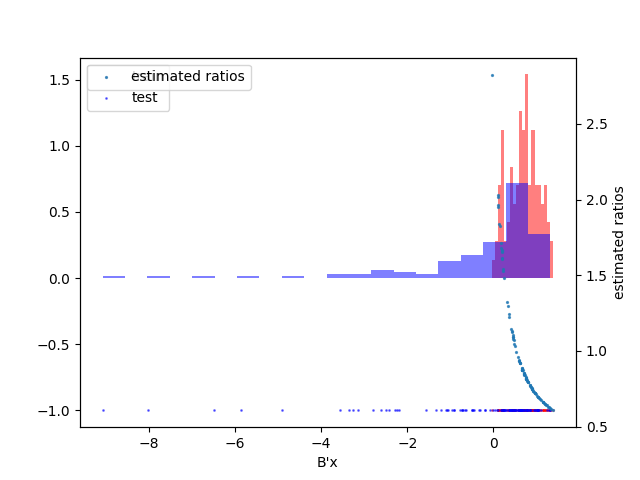

('train_loss: 9344.40',)
('test_loss: 587157.11',)


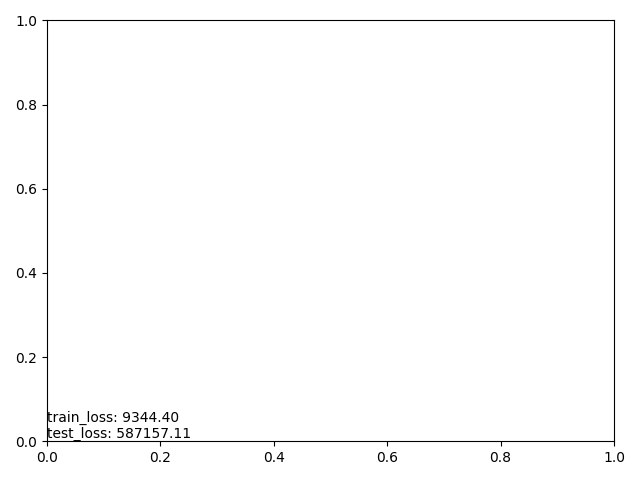

b_norm: 1.0


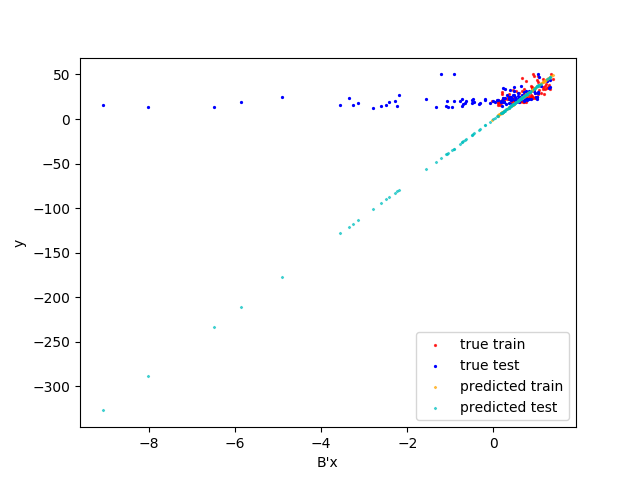

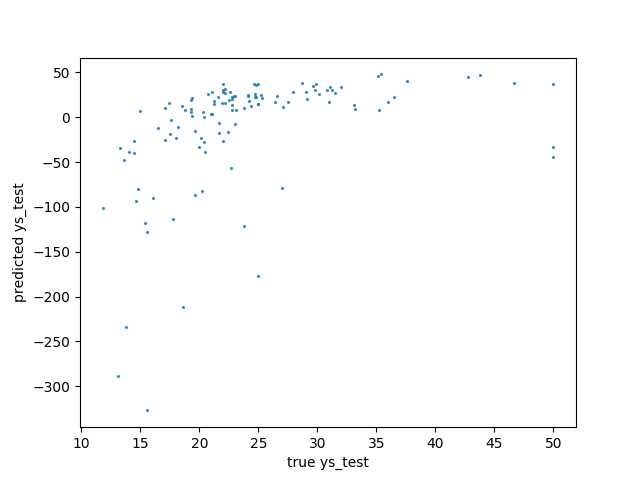

         489271761 function calls (486917962 primitive calls) in 672.035 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
30765916/28767828  144.149    0.000  364.877    0.000 core.py:121(__call__)
  2207810   51.993    0.000   51.993    0.000 {numpy.core.multiarray.dot}
   440509   44.360    0.000  486.139    0.001 core.py:35(backward_pass)
  1235527   31.060    0.000  182.906    0.000 numpy_grads.py:390(gradfun)
   179757   30.789    0.000   30.789    0.000 {method 'repeat' of 'numpy.ndarray' objects}
  1342630   29.375    0.000   29.375    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   138565   28.677    0.000   90.544    0.001 utils.py:19(get_gaussian_K)
  1507098   22.880    0.000   35.476    0.000 numpy_extra.py:126(primitive_sum_arrays)
 78543531   19.252    0.000   19.254    0.000 {isinstance}
     1275   15.558    0.012  228.653    0.179 optimize.py:874(_minimize_bfgs)
  6177635   12.956    0.000   15.321    0.

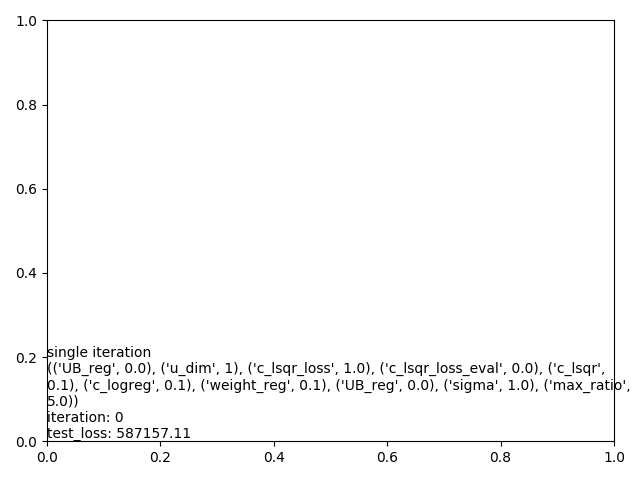

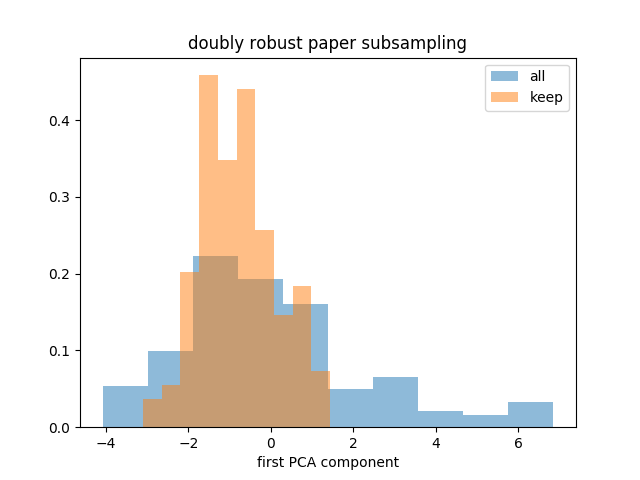

('seed: 1',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (222, 13) original_ys_train: (222,)',)
('original_xs_test: (128, 13) original_ys_test: (128,)',)
('sampled_xs_train: (120, 13) sampled_ys_train: (120,)',)


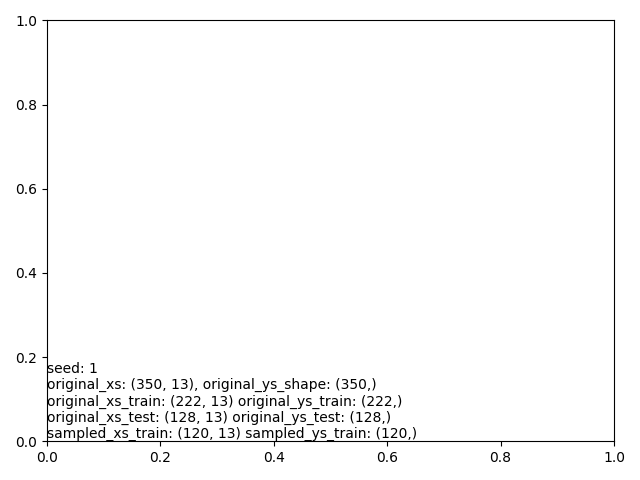

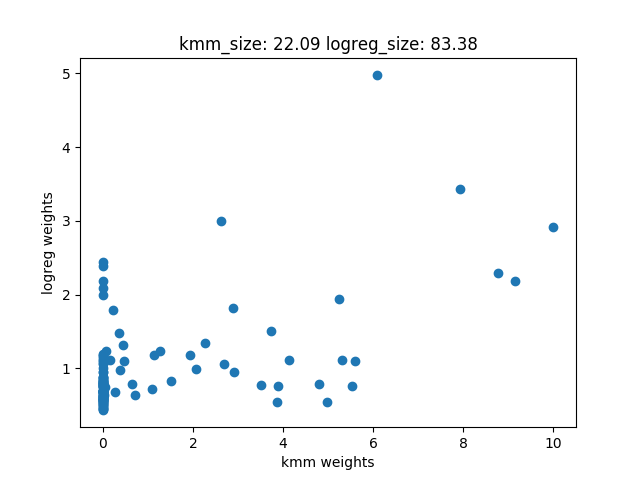

 iter		   cost val	    grad. norm
    1	+6.4555895468271665e+04	2.89832923e+04
    2	+4.9890247472088588e+04	6.18190998e+04
    3	+4.3685831796223451e+04	6.73806029e+04
    4	+4.3044169465281695e+04	8.01960927e+04
    5	+4.0580142872055789e+04	7.34116945e+04
    6	+3.3135835363767954e+04	2.77618590e+04
    7	+3.1784271450262924e+04	3.34287411e+04
    8	+3.0969224832223579e+04	2.21807108e+04
    9	+3.0556924689486419e+04	2.58533548e+04
   10	+3.0105857215954788e+04	2.21232296e+04
   11	+2.9706260919864588e+04	1.32041415e+04
   12	+2.9473377413274866e+04	2.40954931e+04
   13	+2.9082468765579782e+04	1.16088953e+04
   14	+2.8958798259188705e+04	2.76278212e+04
   15	+2.8593350397250451e+04	1.42954333e+04
   16	+2.8503275416671742e+04	2.14190117e+04
   17	+2.8231004182194541e+04	1.18954606e+04
   18	+2.8077003135117699e+04	1.88539705e+04
   19	+2.7808565251836713e+04	1.05903982e+04
   20	+2.7648273554640520e+04	2.01262361e+04
   21	+2.7356653420604274e+04	9.72446310e+03
   22	+2.719845138911

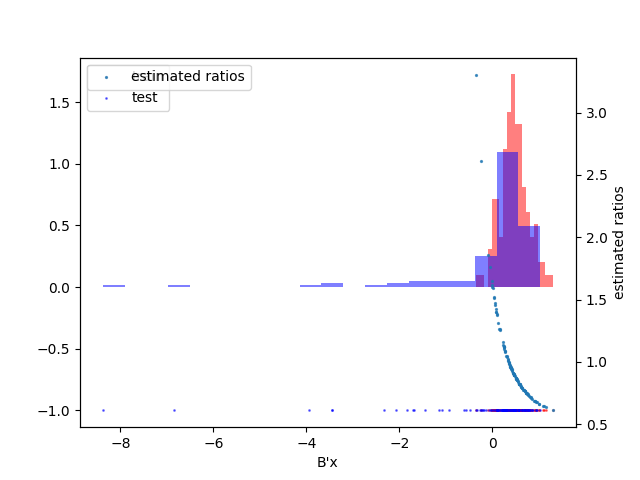

('train_loss: 15816.27',)
('test_loss: 433866.94',)


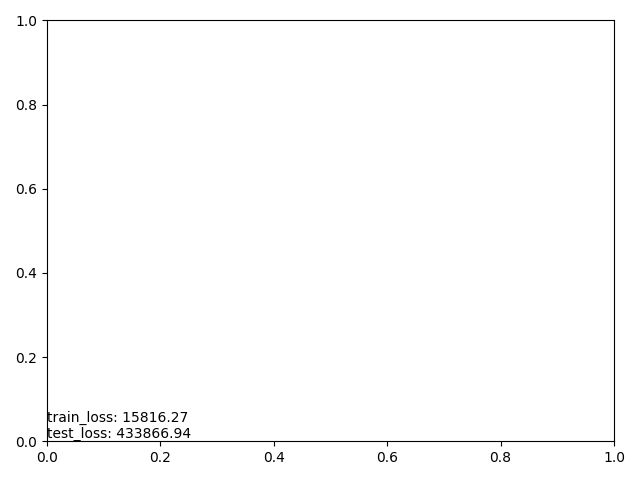

b_norm: 1.0


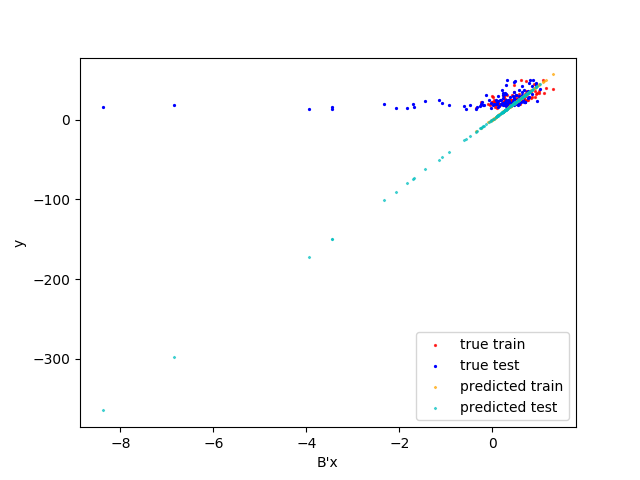

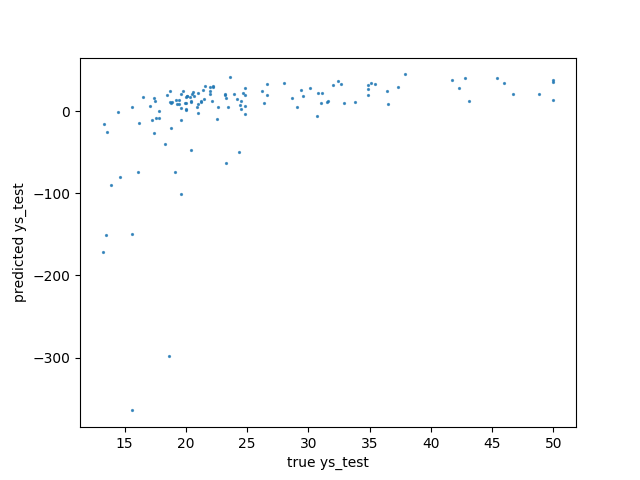

         518935113 function calls (516553934 primitive calls) in 727.385 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
31955080/29897888  157.263    0.000  403.728    0.000 core.py:121(__call__)
  2171432   59.527    0.000   59.527    0.000 {numpy.core.multiarray.dot}
   467424   48.477    0.000  536.735    0.001 core.py:35(backward_pass)
   181424   41.309    0.000   41.309    0.000 {method 'repeat' of 'numpy.ndarray' objects}
  1341953   34.224    0.000   34.224    0.000 {method 'reduce' of 'numpy.ufunc' objects}
  1291772   32.026    0.000  192.372    0.000 numpy_grads.py:390(gradfun)
   124210   30.836    0.000  100.986    0.001 utils.py:19(get_gaussian_K)
  1613448   26.689    0.000   40.591    0.000 numpy_extra.py:126(primitive_sum_arrays)
 81910503   19.818    0.000   19.820    0.000 {isinstance}
     1212   16.622    0.014  231.548    0.191 optimize.py:874(_minimize_bfgs)
  6458860   13.398    0.000   15.833    0.

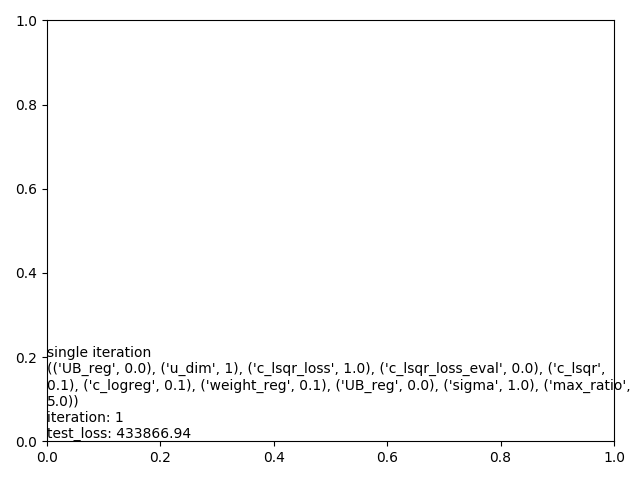

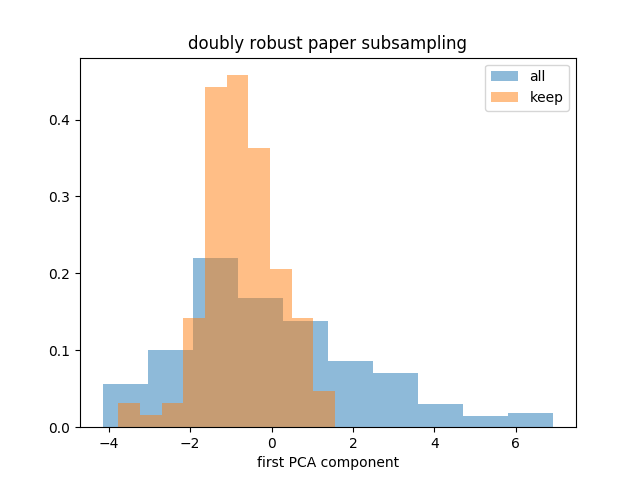

('seed: 2',)
('original_xs: (350, 13), original_ys_shape: (350,)',)
('original_xs_train: (242, 13) original_ys_train: (242,)',)
('original_xs_test: (108, 13) original_ys_test: (108,)',)
('sampled_xs_train: (119, 13) sampled_ys_train: (119,)',)


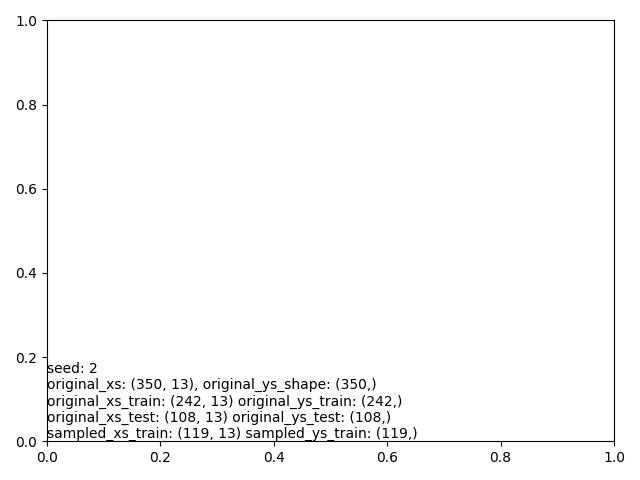

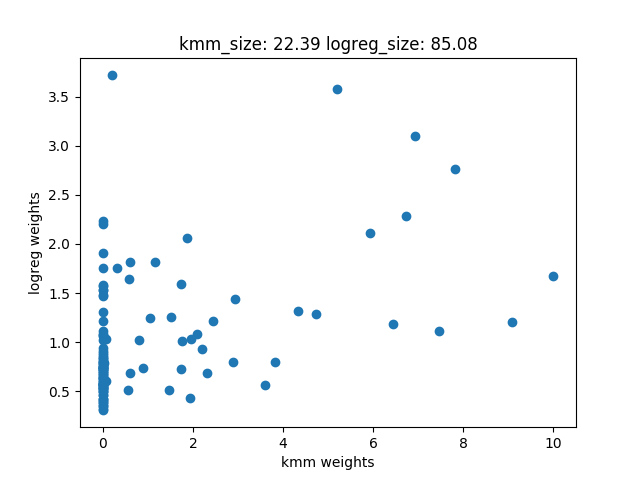

 iter		   cost val	    grad. norm
    1	+7.9129209476727367e+04	1.88213649e+04
    2	+7.7222122886342375e+04	2.56497486e+04
    3	+7.7100281326335520e+04	2.70596232e+04
    4	+7.6623719311492692e+04	2.58344616e+04
    5	+7.5009847645336384e+04	1.78507404e+04
    6	+7.4403931986372059e+04	2.54602307e+04
    7	+7.2824057262960807e+04	1.80053840e+04
    8	+5.9531744301757142e+04	6.68044231e+04
    9	+4.1162440261573633e+04	4.83128255e+04
   10	+2.9294169026120057e+04	5.91364545e+04
   11	+2.9273447289578649e+04	7.07097187e+04
   12	+2.9190765032428571e+04	7.03766849e+04
   13	+2.8863246379464043e+04	6.89933512e+04
   14	+2.7611521033375644e+04	6.27805417e+04
   15	+2.3776893202851348e+04	3.73332590e+04
   16	+2.0256661887467657e+04	3.11846328e+04
   17	+1.8949332350350742e+04	2.66761443e+04
   18	+1.8237470995741089e+04	2.88000393e+04
   19	+1.8011698446480947e+04	3.19749852e+04
   20	+1.7332002182677563e+04	1.69504594e+04
   21	+1.7000407125827587e+04	1.10889438e+04
   22	+1.682908383194

KeyboardInterrupt: 

In [11]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)